<a href="https://colab.research.google.com/github/iudeen/Flood-Prediction/blob/master/Flood%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Upload Rainfall Data 

In [111]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
df_rain = pd.read_csv("Hoppers Crossing-Hourly-Rainfall.csv")

In [74]:
df_rain.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm)
0,2018-12-02 18:00:00,0.0,0.0
1,2018-12-02 17:00:00,0.0,0.0
2,2018-12-02 16:00:00,0.0,0.0
3,2018-12-02 15:00:00,0.0,0.0
4,2018-12-02 14:00:00,0.0,0.0


In [75]:
df_rain.shape

(78848, 3)

In [76]:
df_rain.describe()  


,Current rainfall (mm),Cumulative rainfall (mm)
count,78844.000000,78847.000000
mean,0.049206,0.586580
std,0.765296,2.770216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


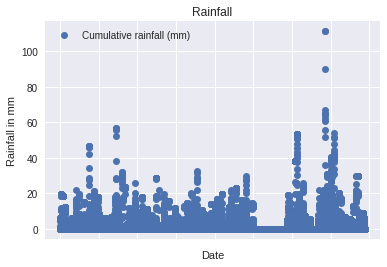

In [78]:
df_rain.plot(x='Date/Time', y='Cumulative rainfall (mm)', style='o')  

plt.title('Rainfall')  
plt.xlabel('Date')  
plt.ylabel('Rainfall in mm')  
plt.show()  

Upload River Data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
df_river = pd.read_csv("Hoppers Crossing-Hourly-River-Level.csv")

In [80]:
df_river.head()

,Date/Time,Level (m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63


In [81]:
df_river.shape

(78822, 2)

In [82]:
df_river.describe()  

,Level (m)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


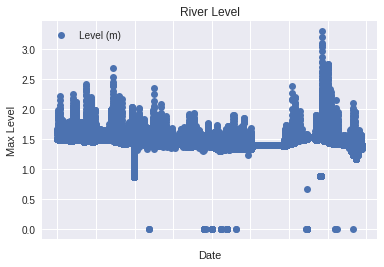

In [83]:
df_river.plot(x='Date/Time', y='Level (m)', style='o')  
plt.title('River Level')  
plt.xlabel('Date')  
plt.ylabel('Max Level')  
plt.show()  

In [84]:
#df_river["Date/Time"] = df_river["Date/Time"].str.replace("00:00", "")
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


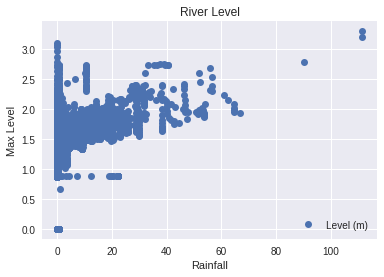

In [85]:
df.plot(x='Cumulative rainfall (mm)', y='Level (m)', style='o')  
plt.title('River Level')  
plt.xlabel('Rainfall')  
plt.ylabel('Max Level')  
plt.show()  

In [86]:
df['Cumulative rainfall (mm)'] = df['Cumulative rainfall (mm)'].fillna(0)
df['Level (m)'] = df['Level (m)'].fillna(0)

df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,0.00
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


In [0]:
#df = df[(df != 0).all(1)]

In [88]:
df = df.drop(columns=['Current rainfall (mm)', 'Date/Time'])
df.shape

(78850, 2)

In [0]:

X = df.iloc[:, :1].values
y = df.iloc[:, 1:2].values

In [0]:
#print(X)
#print(y)

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


In [100]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
print(regressor.intercept_)

[1.44348876]


In [102]:
print(regressor.coef_)  

[[0.01698111]]


In [0]:
y_pred = regressor.predict(X_test) 

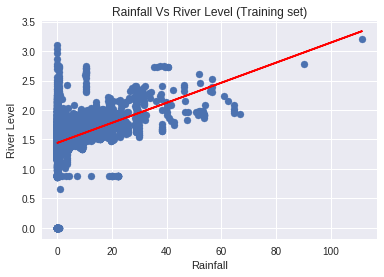

In [104]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

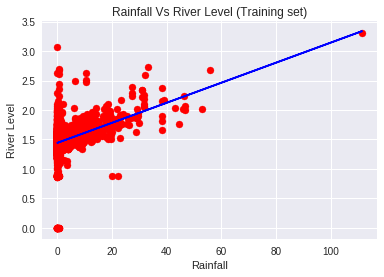

In [105]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

In [0]:
#@title Enter Rainfall amount in mm
Rainfall_Amount =  #@param {type:"number"}




In [115]:
#@title Flood possibility
predicted_riverlevel = regressor.predict(Rainfall_Amount)
print(predicted_riverlevel)
if (predicted_riverlevel > 1.5):
  print("FLOOD")
else:
  print("No FLOOD")

[[2.46235523]]
FLOOD
